In [1]:
from test_setups import grid_test

import sys
sys.path.append('../..')
from src.pomdp import *

import pandas as pd
import numpy as np
import cupy as cp
import cv2

In [2]:
from cupy.cuda import runtime as cuda_runtime
cuda_runtime.setDevice(0)

## Model retrieval

In [3]:
def reward_func(s,a,sn,o):
    return np.where(sn == 10890, 1.0, 0.0)

In [4]:
model = Model.load_from_file('./Models/Alt_Wrap_GroundAir.pck')

In [10]:
folder = './Test_GroundAir_FSVI_300it_100exp_099g_e6eps_20run_20231121_165329/'
vf_folder = folder + 'ValueFunctions/'

## VF That has 3 averages (run 9)

In [6]:
vf_file = vf_folder + 'run-9-VF.gzip'
vf = ValueFunction.load_from_file(vf_file, model)

  0%|          | 0/1000 [00:00<?, ?it/s]

All 1560 simulations done in 151.173s:
	- Simulations reached goal: 1560/1560 (0 failures)
	- Average step count: 287.92051282051284
	- Average total rewards: 1.0
	- Average discounted rewards (ADR): 0.18458017056301929


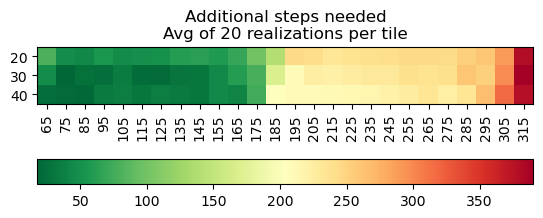

In [12]:
res_3 = grid_test(vf.to_gpu(), points_per_cell=20)

In [13]:
res_3.to_csv(folder + 'GridSimulations/SimsRun-9.csv')

## VF That has bad performances (run 16)

In [14]:
vf_file = vf_folder + 'run-16-VF.gzip'
vf = ValueFunction.load_from_file(vf_file, model)

  0%|          | 0/1000 [00:00<?, ?it/s]

All 1560 simulations done in 159.691s:
	- Simulations reached goal: 1560/1560 (0 failures)
	- Average step count: 287.3974358974359
	- Average total rewards: 1.0
	- Average discounted rewards (ADR): 0.17274741876059418


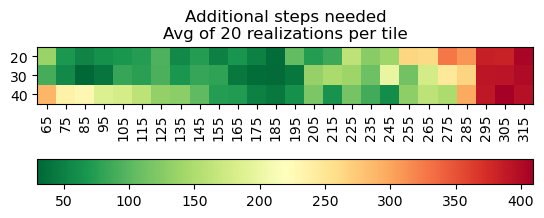

In [15]:
res_bad = grid_test(vf.to_gpu(), points_per_cell=20)

In [16]:
res_bad.to_csv(folder + 'GridSimulations/SimsRun-16.csv')

## VF That has good performances (run 0)

In [17]:
vf_file = vf_folder + 'run-0-VF.gzip'
vf = ValueFunction.load_from_file(vf_file, model)

  0%|          | 0/1000 [00:00<?, ?it/s]

All 1560 simulations done in 134.845s:
	- Simulations reached goal: 1560/1560 (0 failures)
	- Average step count: 255.9820512820513
	- Average total rewards: 1.0
	- Average discounted rewards (ADR): 0.18533165861416678


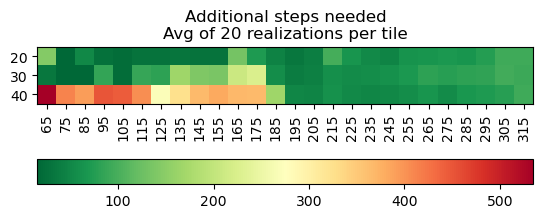

In [18]:
res_good = grid_test(vf.to_gpu(), points_per_cell=20)

In [19]:
res_good.to_csv(folder + 'GridSimulations/SimsRun-0.csv')